<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/AdvancedDataMining/blob/main/256%20Crop%20Recommendation%20System/256_Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
from IPython.core.display import display, HTML, Javascript
import IPython.display as py_display
htmlt = '''
<center><h1 style="font-family: parklane">Which Crop Can we Grow 🤔 ?</h1></center>
<center><img src="https://drive.google.com/uc?id=1R4J3xmaheC99-r7ooFvN406lnYCovFYR" width="800" 
     height="500"></center>
'''

h = display(HTML(htmlt))
py_display.display_javascript(h)

In [ ]:
#@title
# ===== Plot values on bars =====
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# 🌱 Crop  Recommendation Project

* Data Preparation
* EDA
* Feature Engineering
* Training a Model


**Dataset**

The dataset consists of the following parameters:

- N: Nitrogen content in soil

- P: Phosphorus content in soil

- K: Potassium content in soil

- Temperature: Temperature in degree Celsius

- Humidity: Relative humidity in percentage

- pH: Indicate the chemical composition of soil

- Rainfall: Rainfall in mm
 
Target label denotes the most suitable crop that can be grown in the given environment

In [ ]:
!pip install plotly
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 12.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install gradio
!pip install pycaret
!pip install Jinja2
!pip install markupsafe==2.0.1
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 60 kB/s
     |████████████████████████████████| 9.4 MB 14.0 MB/s 
     |████████████████████████████████| 102 kB 46.5 MB/s 
     |████████████████████████████████| 679 kB 28.5 MB/s 
     |████████████████████████████████| 62 kB 54 kB/s 
     |████████████████████████████████| 9.9 MB 59.9 MB/s 
     |████████████████████████████████| 4.7 MB 39.6 MB/s 
     |████████████████████████████████| 296 kB 93.9 MB/s 
     |████████████████████████████████| 295 kB 63.8 MB/s 
     |████████████████████████████████| 965 kB 56.7 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=fb3e190a045d8b608e262ae7afbe5bf364b967efd2429c2eaaed24c12e047e60
  Stored in directory: /tmp/pip-ephem-wheel-cache-gofeeysy/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-non

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 15.1 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 2.3 MB 56.3 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 106 kB 66.3 MB/s 
     |████████████████████████████████| 278 kB 65.1 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 58 kB 6.4 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=ccc3f199dab2a3de7137563a16e16e15f948af5037659185c328c87556854485
  Stored in dire

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 15.1 MB/s 
     |████████████████████████████████| 76.6 MB 24 kB/s 
     |████████████████████████████████| 268 kB 61.3 MB/s 
     |████████████████████████████████| 240 kB 60.2 MB/s 
     |████████████████████████████████| 125 kB 41.1 MB/s 
     |████████████████████████████████| 193.6 MB 71 kB/s 
     |████████████████████████████████| 9.7 MB 39.1 MB/s 
     |████████████████████████████████| 121 kB 81.4 MB/s 
     |████████████████████████████████| 83 kB 2.1 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=8fbb7a27b2d66ac1198d64713f3021ad065b01e5083d20230ce90cfc165b7d20
  Stored in directory: /root/.cache

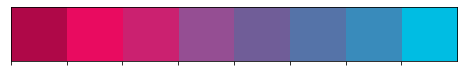

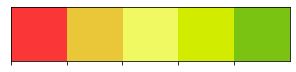

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from scipy.stats import norm
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import os  

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from wordcloud import WordCloud
from pandas_profiling import ProfileReport

my_colors = ["#AF0848", "#E90B60", "#CB2170", "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]
my_colors1 = ["#fb3636", "#eac738", "#f0f961", "#d2ec00", "#7ac313"]
sns.palplot(sns.color_palette(my_colors))
sns.palplot(sns.color_palette(my_colors1))
plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/AdvancedDataMining/main/DataSources/Crop_recommendation.csv')

# Data Understanding



In [ ]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [ ]:
print("Total Records: ", df.shape[0])
print("Total Features: ", df.shape[1])

Total Records:  2200
Total Features:  8


In [ ]:
print("Different Crops in the dataset:", df['label'].nunique())
df['label'].unique()

Different Crops in the dataset: 22


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Except target feature(categorical) all other features are numerical

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

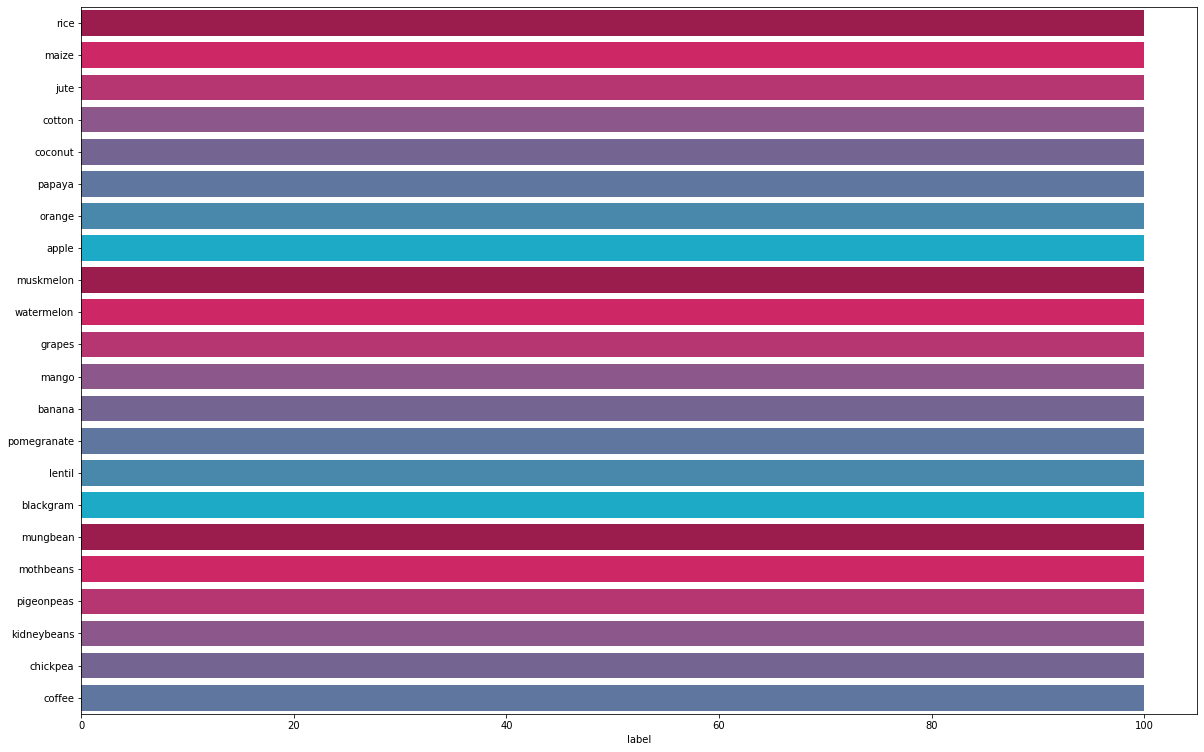

In [ ]:
plt.figure(figsize=(20,13))
loc=df['label'].value_counts()
axs = sns.barplot(x=loc,y=loc.index,palette=my_colors)

Each crop has equal number of entries

<AxesSubplot: >

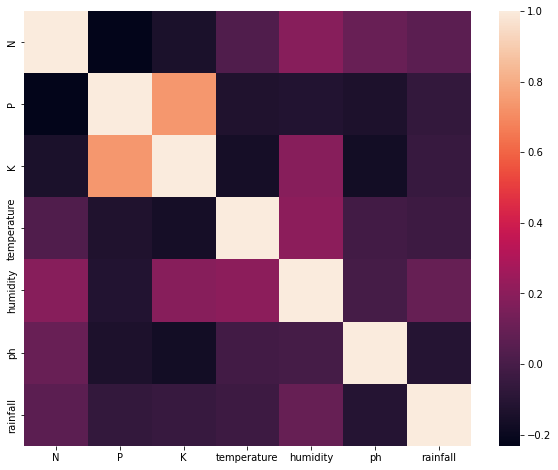

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Pivot to view all crops(label) and the mean of their attributes such as Potassium, Nitrogen, Phosphurus, Humidity, pH, rainfall and temperature 

In [ ]:
crop_summary=pd.pivot_table(df,index=['label'],aggfunc='mean')

In [ ]:
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

In [ ]:
summary = crop_summary.reset_index() 

In [ ]:
summary

label       K       N       P   humidity        ph    rainfall  \
0         apple  199.89   20.80  134.22  92.333383  5.929663  112.654779   
1        banana   50.05  100.23   82.01  80.358123  5.983893  104.626980   
2     blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
3      chickpea   79.92   40.09   67.79  16.860439  7.336957   80.058977   
4       coconut   30.59   21.98   16.93  94.844272  5.976562  175.686646   
5        coffee   29.94  101.20   28.74  58.869846  6.790308  158.066295   
6        cotton   19.56  117.77   46.24  79.843474  6.912675   80.398043   
7        grapes  200.11   23.18  132.53  81.875228  6.025937   69.611829   
8          jute   39.99   78.40   46.86  79.639864  6.732778  174.792798   
9   kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
10       lentil   19.41   18.77   68.36  64.804785  6.927932   45.680454   
11        maize   19.79   77.76   48.44  65.092249  6.245190   84.766988   
12        mango   29.92   20.07   27.18  50.156573  5.766373   94.704515   
13    mothbeans   20.23   21.44   48.01  53.160418  6.831174   51.198487   
14     mungbean   19.87   20.99   47.28  85.499975  6.723957   48.403601   
15    muskmelon   50.08  100.32   17.72  92.342802  6.358805   24.689952   
16       orange   10.01   19.58   16.55  92.170209  7.016957  110.474969   
17       papaya   50.04   49.88   59.05  92.403388  6.741442  142.627839   
18   pigeonpeas   20.29   20.73   67.73  48.061633  5.794175  149.457564   
19  pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
20         rice   39.87   79.89   47.58  82.272822  6.425471  236.181114   
21   watermelon   50.22   99.42   17.00  85.160375  6.495778   50.786219   

    temperature  
0     22.630942  
1     27.376798  
2     29.973340  
3     18.872847  
4     27.409892  
5     25.540477  
6     23.988958  
7     23.849575  
8     24.958376  
9     20.115085  
10    24.509052  
11    22.389204  
12    31.208770  
13    28.194920  
14    28.525775  
15    28.663066  
16    22.765725  
17    33.723859  
18    27.741762  
19    21.837842  
20    23.689332  
21    25.591767

# Data Preparation

* **Check for Missingness in data**
* **Visualize the effect of features on the target variable(Crop)**


* **Missing Values**

In [ ]:
df.isna().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

There are no missing values. So need to perform any imputation strategies

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## **EDA**

**Distribution of crop features in the dataset**

In [ ]:
fig1= px.bar(df,x='label',y='N')
fig1.show()

fig1= px.bar(df,x='label',y='P')
fig1.show()

fig1= px.bar(df,x='label',y='K')
fig1.show()

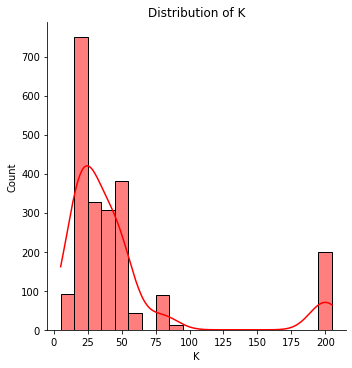

In [ ]:
sns.displot(df['K'], kde='kde', color='red',bins=20)
plt.title('Distribution of K')
plt.show()

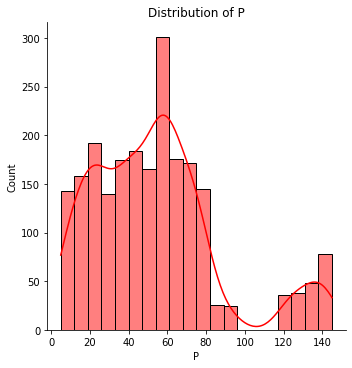

In [ ]:
sns.displot(df['P'], kde='kde', color='red',bins=20)
plt.title('Distribution of P')
plt.show()

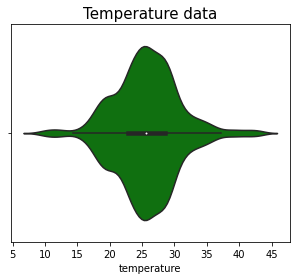

In [ ]:
plt.figure(figsize=(5,4))
sns.violinplot(x='temperature',data=df,color='g');
plt.title("Temperature data",{'fontsize':15});

Word cloud with the different types of crops in the dataset

In [ ]:
# Function to generate world cloud 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");

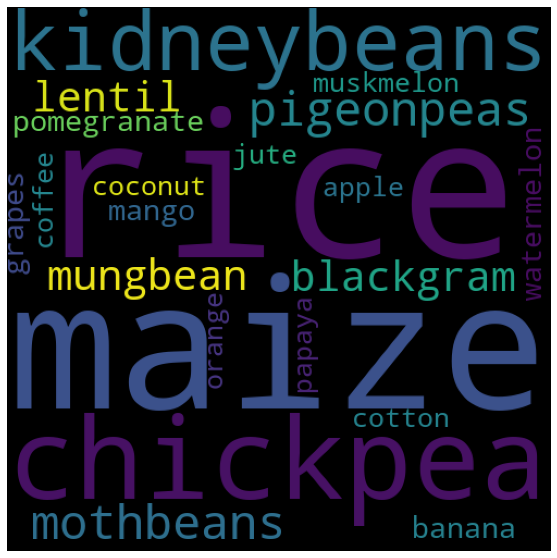

In [ ]:
all_words = ' '.join([text for text in df['label']]) 
wordcloud = WordCloud(width = 500, height = 500,random_state=10, collocations = False).generate(all_words)
plot_cloud(wordcloud)

* **Lets see the efftect of each feature on label(Crop)**

Top 10 crops that requires more Nitrogen

In [ ]:
top_10_N = df.groupby('label').N.mean().sort_values(ascending=False).head(10).reset_index()
top_10_N.columns = ["label", "N"]
print(top_10_N)

        label       N
0      cotton  117.77
1      coffee  101.20
2   muskmelon  100.32
3      banana  100.23
4  watermelon   99.42
5        rice   79.89
6        jute   78.40
7       maize   77.76
8      papaya   49.88
9    chickpea   40.09


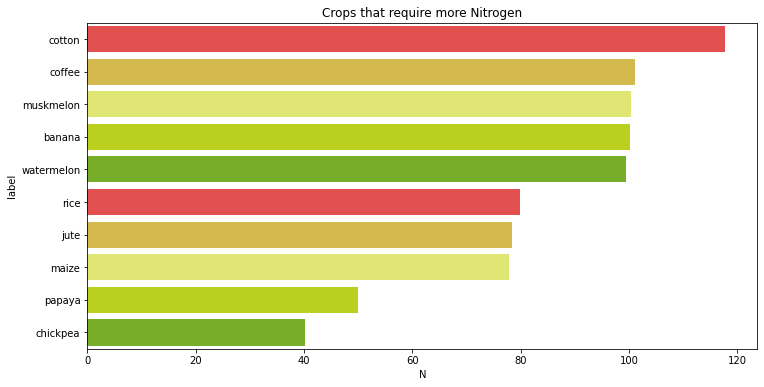

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_N, x="N", y="label", palette = my_colors1)

plt.title('Crops that require more Nitrogen');

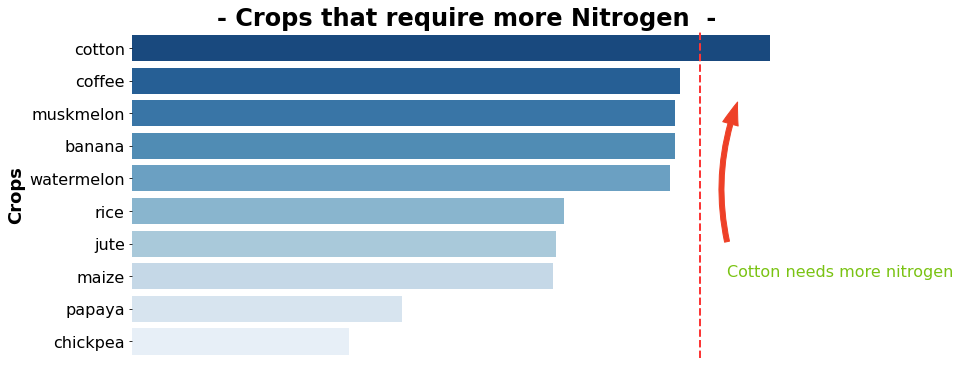

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_N, x="N", y="label", palette= 'Blues_r')

plt.title('- Crops that require more Nitrogen  -', size=24, weight="bold")

#show_values_on_bars(axs=ax, h_v="h", space=1)
plt.ylabel("Crops", size = 18, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)

# Vertical line
plt.axvline(x=105, ymin=0, ymax=45, color='#fb3636', ls='--', lw=2)
plt.text(x=110, y=7, s="Cotton needs more nitrogen",
         color='#7ac313', size=16)

# Arrow
style = "Simple, tail_width=5, head_width=16, head_length=23"
kw = dict(arrowstyle=style, color="#ee4027")
arrow = patches.FancyArrowPatch((110, 6), (112, 1.6),
                             connectionstyle="arc3,rad=-.15", **kw)
plt.gca().add_patch(arrow)


sns.despine(left=True, bottom=True);

Top 10 crops - growing in soil with least Nitrogen

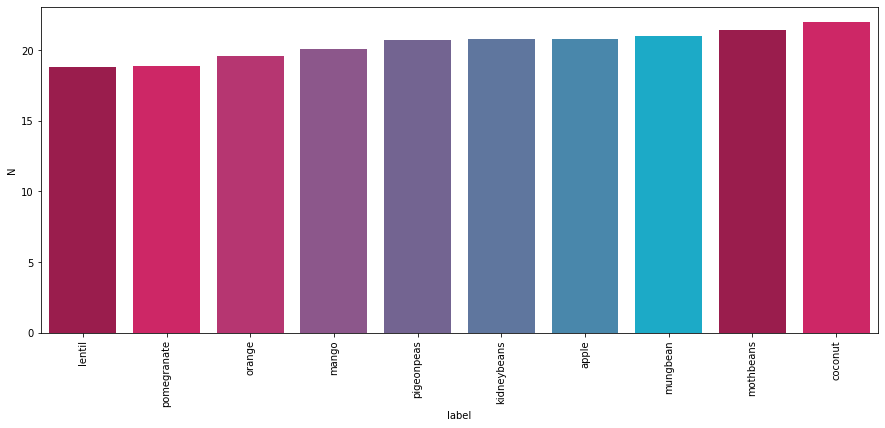

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data= summary.sort_values('N').head(10),palette = my_colors)
plt.xticks(rotation=90)
plt.show()

Sorting crops based on Nitrogen Requirement

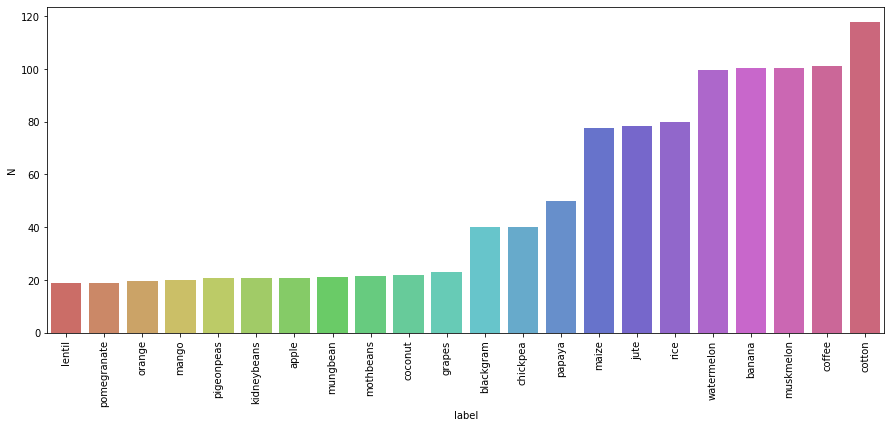

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data=summary.sort_values('N'),palette='hls')
plt.xticks(rotation=90)
plt.show()

Top 10 Crops that needs more Phosphorous

In [ ]:
top_10_P = df.groupby('label').P.mean().sort_values(ascending=False).head(10).reset_index()
top_10_P.columns = ["label", "P"]
print(top_10_P)

         label       P
0        apple  134.22
1       grapes  132.53
2       banana   82.01
3       lentil   68.36
4     chickpea   67.79
5   pigeonpeas   67.73
6  kidneybeans   67.54
7    blackgram   67.47
8       papaya   59.05
9        maize   48.44


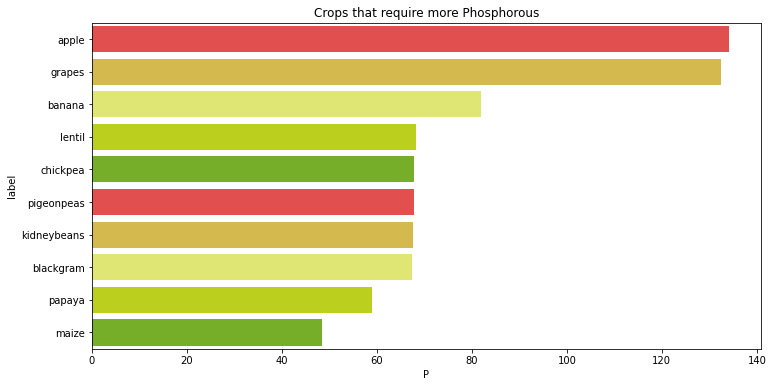

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_10_P, x="P", y="label", palette = my_colors1)
plt.title('Crops that require more Phosphorous');

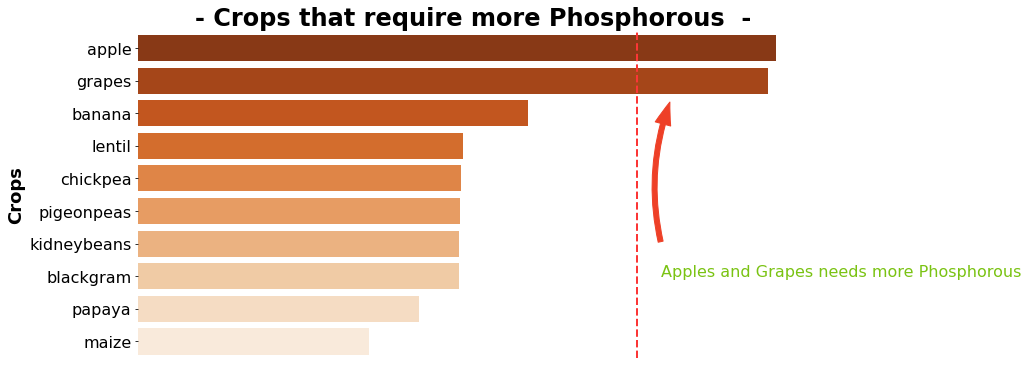

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_P, x="P", y="label", palette= 'Oranges_r')

plt.title('- Crops that require more Phosphorous  -', size=24, weight="bold")

#show_values_on_bars(axs=ax, h_v="h", space=1)
plt.ylabel("Crops", size = 18, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)

# Vertical line
plt.axvline(x=105, ymin=0, ymax=45, color='#fb3636', ls='--', lw=2)
plt.text(x=110, y=7, s="Apples and Grapes needs more Phosphorous",
         color='#7ac313', size=16)

# Arrow
style = "Simple, tail_width=5, head_width=16, head_length=23"
kw = dict(arrowstyle=style, color="#ee4027")
arrow = patches.FancyArrowPatch((110, 6), (112, 1.6),
                             connectionstyle="arc3,rad=-.15", **kw)
plt.gca().add_patch(arrow)


sns.despine(left=True, bottom=True);

Top 10 crops requiring least Phosphurus

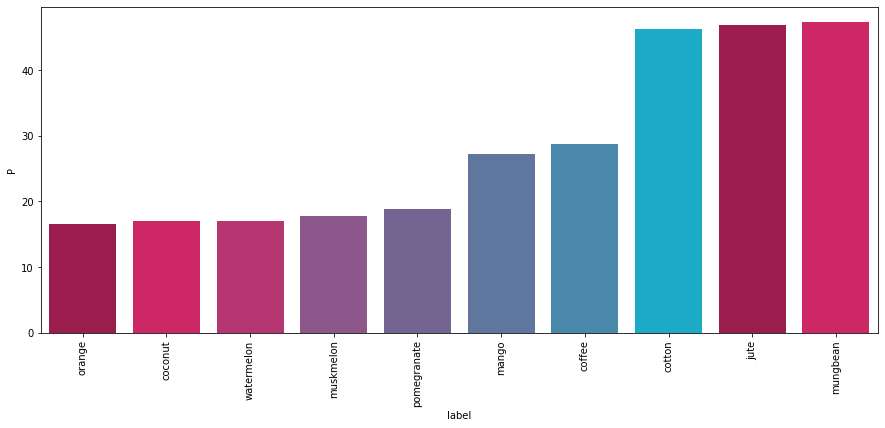

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='P',x='label',data= summary.sort_values('P').head(10),palette = my_colors)
plt.xticks(rotation=90)
plt.show()

Sorting crops based on Phosphorus requirement

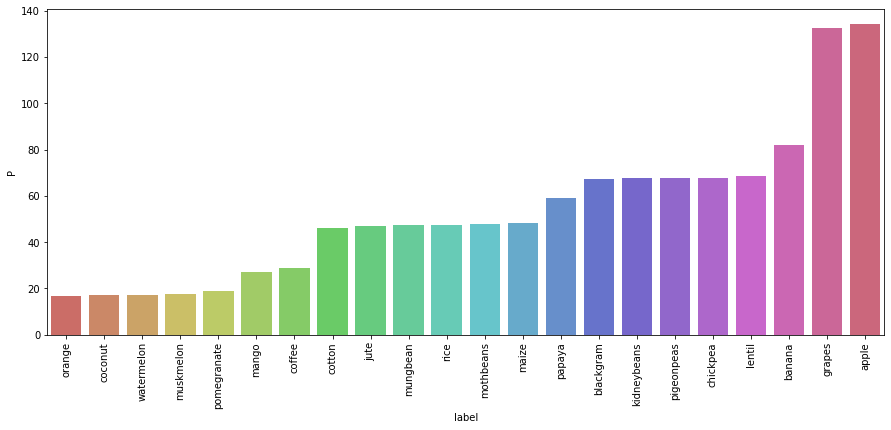

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='P',x='label',data=summary.sort_values('P'),palette='hls')
plt.xticks(rotation=90)
plt.show()

Top 10 Crops that need more temperature

In [ ]:
top_10_t = df.groupby('label').temperature.mean().sort_values(ascending=False).head(10).reset_index()
top_10_t.columns = ["label", "temperature"]
print(top_10_t)

        label  temperature
0      papaya    33.723859
1       mango    31.208770
2   blackgram    29.973340
3   muskmelon    28.663066
4    mungbean    28.525775
5   mothbeans    28.194920
6  pigeonpeas    27.741762
7     coconut    27.409892
8      banana    27.376798
9  watermelon    25.591767


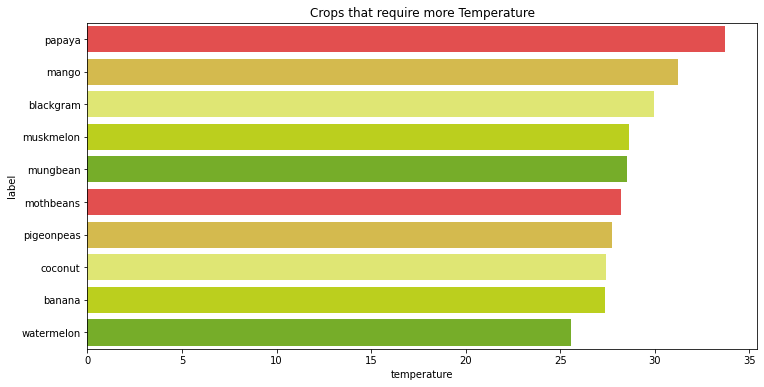

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_10_t, x="temperature", y="label", palette = my_colors1)

plt.title('Crops that require more Temperature');

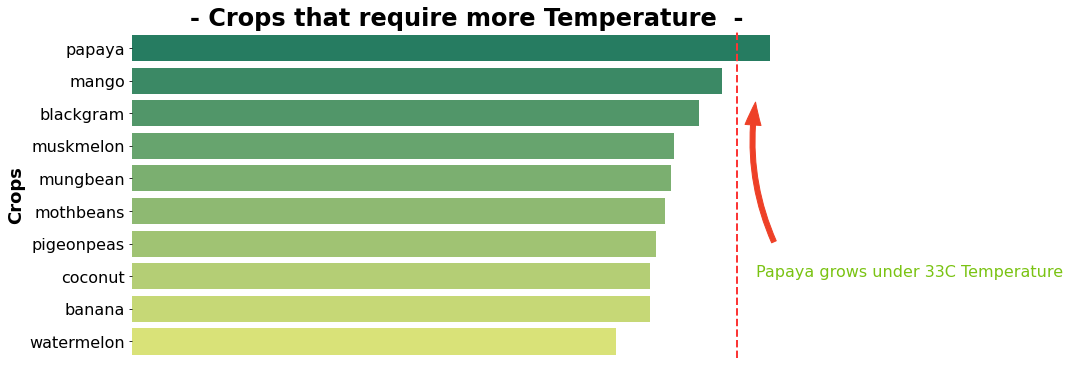

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_t, x="temperature", y="label", palette= 'summer')

plt.title('- Crops that require more Temperature  -', size=24, weight="bold")

#show_values_on_bars(axs=ax, h_v="h", space=1)
plt.ylabel("Crops", size = 18, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)

# Vertical line
plt.axvline(x=32, ymin=0, ymax=45, color='#fb3636', ls='--', lw=2)
plt.text(x=33, y=7, s="Papaya grows under 33C Temperature",
         color='#7ac313', size=16)

# Arrow
style = "Simple, tail_width=5, head_width=16, head_length=23"
kw = dict(arrowstyle=style, color="#ee4027")
arrow = patches.FancyArrowPatch((34, 6), (33, 1.6),
                             connectionstyle="arc3,rad=-.15", **kw)
plt.gca().add_patch(arrow)


sns.despine(left=True, bottom=True);

Top 10 crops - growing in lower temperature

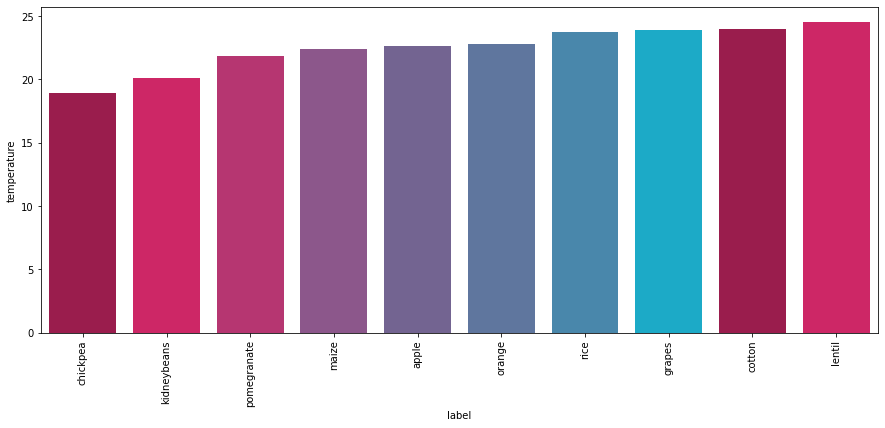

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='temperature',x='label',data= summary.sort_values('temperature').head(10),palette = my_colors)
plt.xticks(rotation=90)
plt.show()

Sorting crops based on temperature

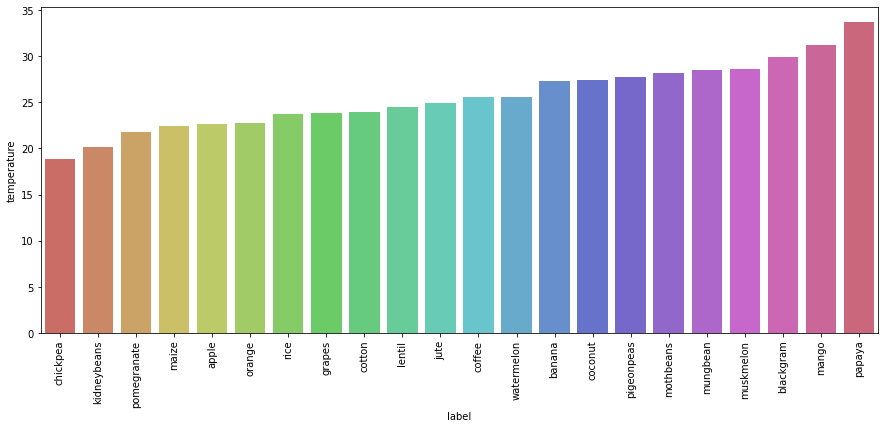

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='temperature',x='label',data=summary.sort_values('temperature'),palette='hls')
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_10_h = df.groupby('label').humidity.mean().sort_values(ascending=False).head(10).reset_index()
top_10_h.columns = ["label", "humidity"]
print(top_10_h)

         label   humidity
0      coconut  94.844272
1       papaya  92.403388
2    muskmelon  92.342802
3        apple  92.333383
4       orange  92.170209
5  pomegranate  90.125504
6     mungbean  85.499975
7   watermelon  85.160375
8         rice  82.272822
9       grapes  81.875228


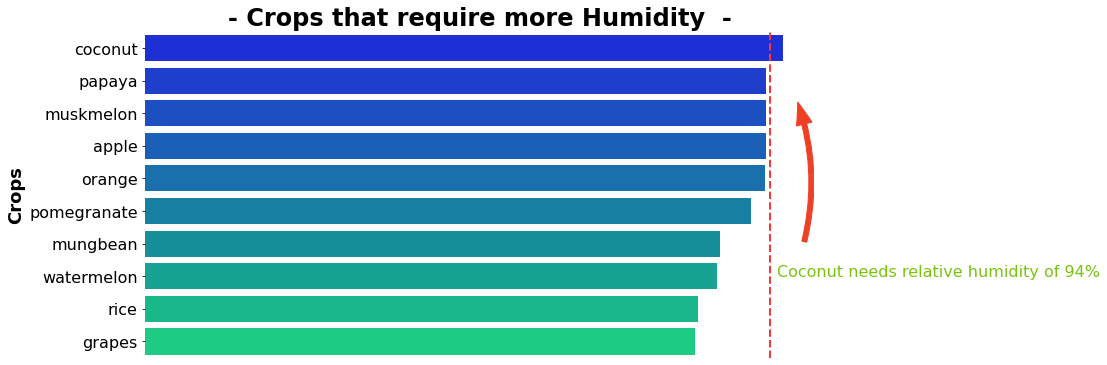

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_h, x="humidity", y="label", palette= 'winter')

plt.title('- Crops that require more Humidity  -', size=24, weight="bold")

#show_values_on_bars(axs=ax, h_v="h", space=1)
plt.ylabel("Crops", size = 18, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)

# Vertical line
plt.axvline(x=93, ymin=0, ymax=45, color='#fb3636', ls='--', lw=2)
plt.text(x=94, y=7, s="Coconut needs relative humidity of 94%",
         color='#7ac313', size=16)

# Arrow
style = "Simple, tail_width=5, head_width=16, head_length=23"
kw = dict(arrowstyle=style, color="#ee4027")
arrow = patches.FancyArrowPatch((98, 6), (97, 1.6),
                             connectionstyle="arc3,rad=.15", **kw)
plt.gca().add_patch(arrow)


sns.despine(left=True, bottom=True);

Top 10 crops - requiring least humidity

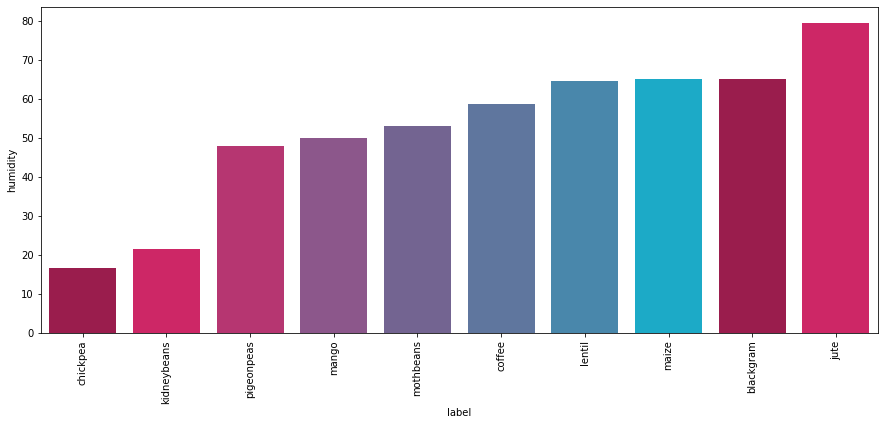

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='humidity',x='label',data= summary.sort_values('humidity').head(10),palette = my_colors)
plt.xticks(rotation=90)
plt.show()

Sorting crops based on Humidity

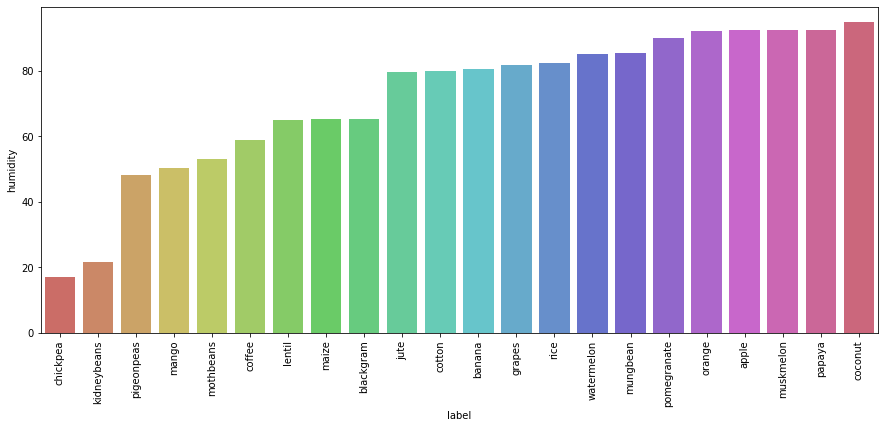

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='humidity',x='label',data=summary.sort_values('humidity'),palette='hls')
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_10_ph = df.groupby('label').ph.mean().sort_values(ascending=False).head(10).reset_index()
top_10_ph.columns = ["label", "ph"]
print(top_10_ph)

       label        ph
0   chickpea  7.336957
1  blackgram  7.133952
2     orange  7.016957
3     lentil  6.927932
4     cotton  6.912675
5  mothbeans  6.831174
6     coffee  6.790308
7     papaya  6.741442
8       jute  6.732778
9   mungbean  6.723957


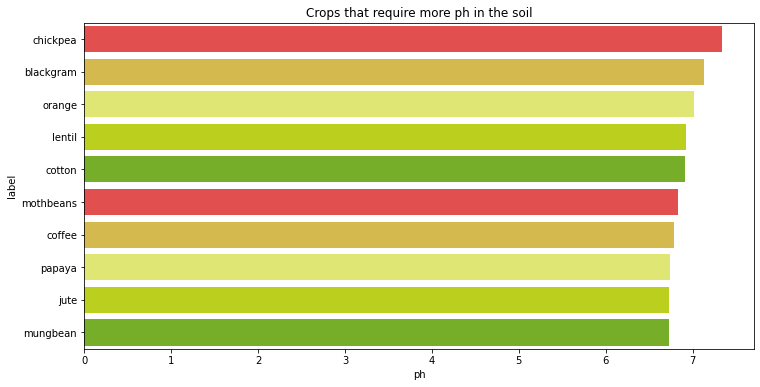

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_ph, x="ph", y="label", palette = my_colors1)

plt.title('Crops that require more ph in the soil');

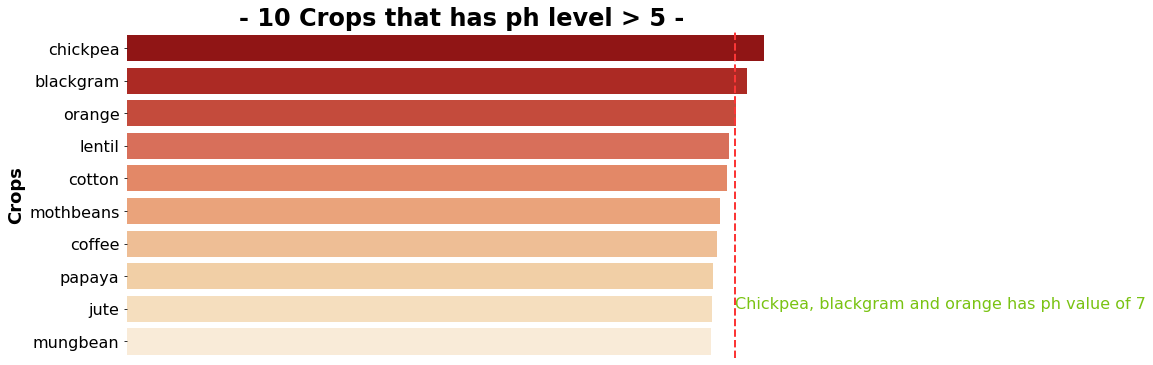

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_ph, x="ph", y="label", palette= 'OrRd_r')

plt.title('- 10 Crops that has ph level > 5 -', size=24, weight="bold")

#show_values_on_bars(axs=ax, h_v="h", space=0.11)
plt.ylabel("Crops", size = 18, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)

# Vertical line
plt.axvline(x=7, ymin=0, ymax=45, color='#fb3636', ls='--', lw=2)
plt.text(x=7, y=8, s="Chickpea, blackgram and orange has ph value of 7",
         color='#7ac313', size=16)


sns.despine(left=True, bottom=True);

Top 10 crops - growing in soil with least pH

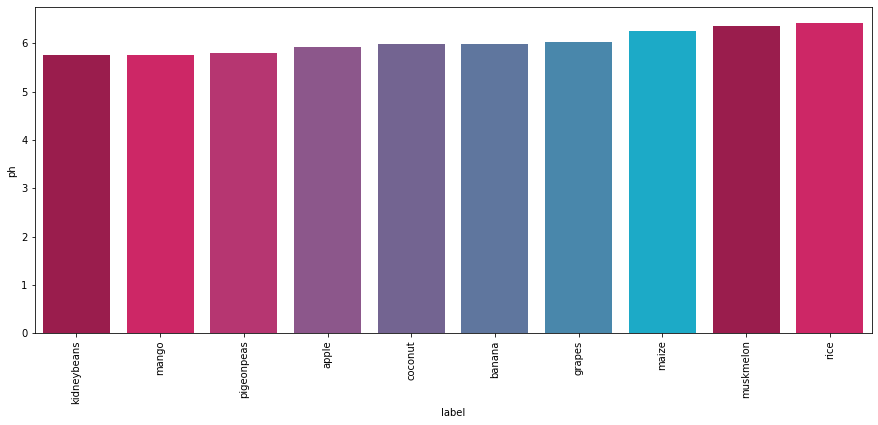

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='ph',x='label',data= summary.sort_values('ph').head(10),palette = my_colors)
plt.xticks(rotation=90)
plt.show()

Sorting crops based on pH of soil

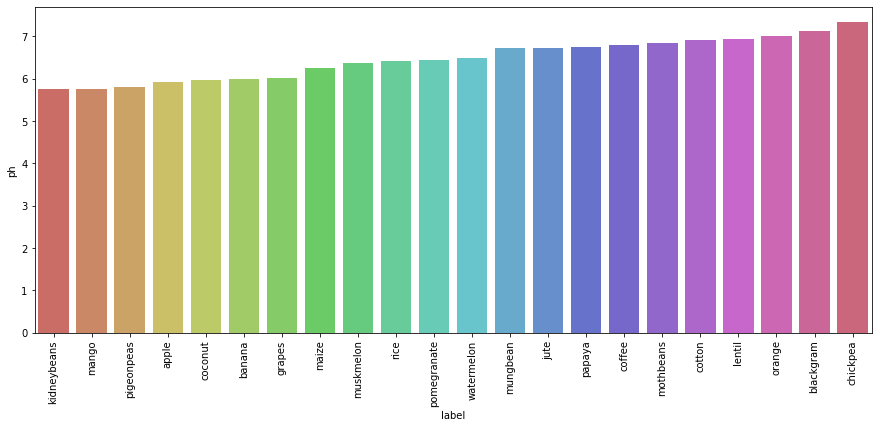

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='ph',x='label',data=summary.sort_values('ph'),palette='hls')
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_10_r = df.groupby('label').rainfall.mean().sort_values(ascending=False).head(10).reset_index()
top_10_r.columns = ["label", "rainfall"]
print(top_10_r)

         label    rainfall
0         rice  236.181114
1      coconut  175.686646
2         jute  174.792798
3       coffee  158.066295
4   pigeonpeas  149.457564
5       papaya  142.627839
6        apple  112.654779
7       orange  110.474969
8  pomegranate  107.528442
9  kidneybeans  105.919778


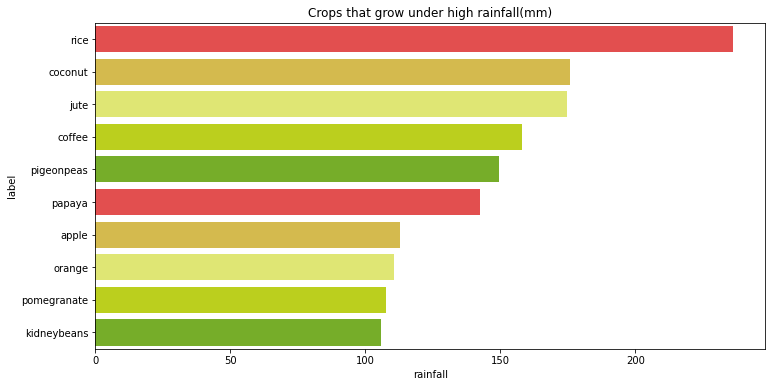

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_10_r, x="rainfall", y="label", palette = my_colors1)
plt.title('Crops that grow under high rainfall(mm)');

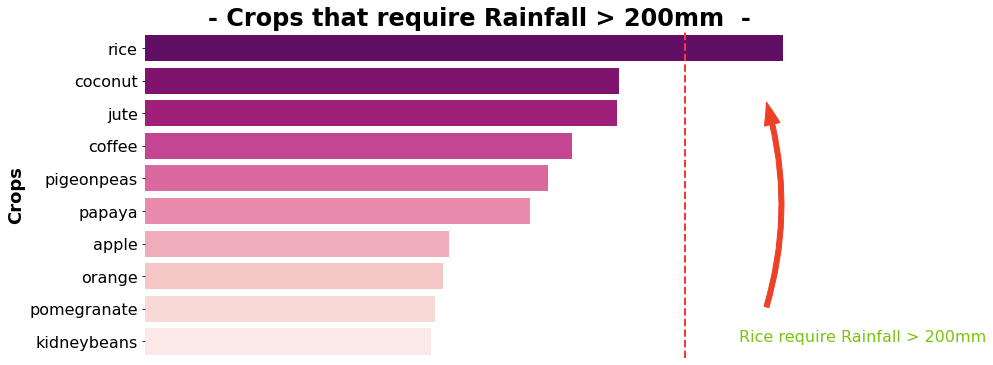

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_r, x="rainfall", y="label", palette= 'RdPu_r')

plt.title('- Crops that require Rainfall > 200mm  -', size=24, weight="bold")

#show_values_on_bars(axs=ax, h_v="h", space=1)
plt.ylabel("Crops", size = 18, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)

# Vertical line
plt.axvline(x=200, ymin=0, ymax=45, color='#fb3636', ls='--', lw=2)
plt.text(x=220, y=9, s="Rice require Rainfall > 200mm",
         color='#7ac313', size=16)

# Arrow
style = "Simple, tail_width=5, head_width=16, head_length=23"
kw = dict(arrowstyle=style, color="#ee4027")
arrow = patches.FancyArrowPatch((230, 8), (230, 1.6),
                             connectionstyle="arc3,rad=.15", **kw)
plt.gca().add_patch(arrow)


sns.despine(left=True, bottom=True);

Top 10 crops - requiring least rainfall

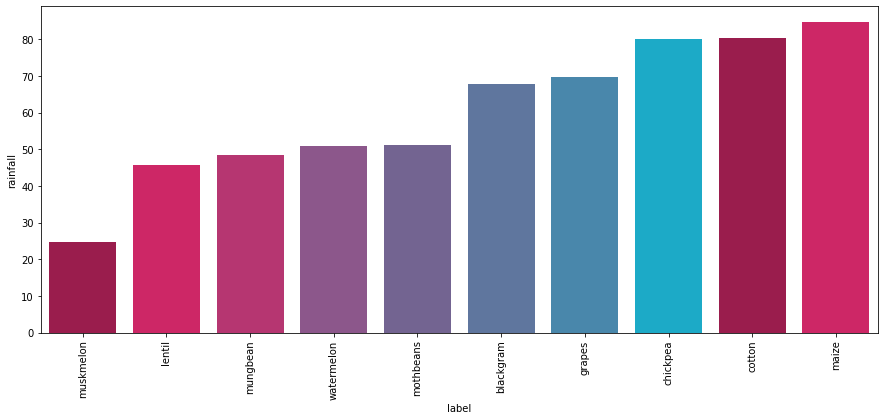

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='rainfall',x='label',data= summary.sort_values('rainfall').head(10),palette = my_colors)
plt.xticks(rotation=90)
plt.show()

Sorting crops based on Rainfall requirement

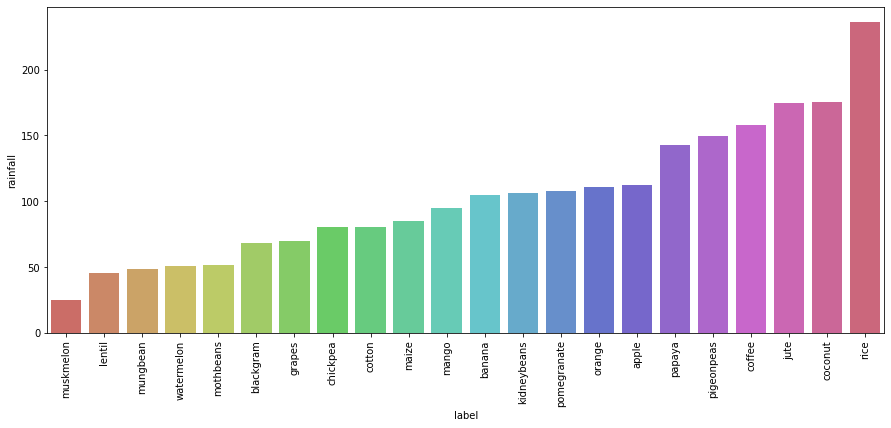

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='rainfall',x='label',data=summary.sort_values('rainfall'),palette='hls')
plt.xticks(rotation=90)
plt.show()

Summer Crops
(temperature > 30) & ['humidity'] > 50)

Winter Crops
(temperature) < 20) & ['humidity'] > 30)

Rainy Crops
(rainfall > 200) & ['humidity'] > 30)

Summer Crops
(temperature > 30) & ['humidity'] > 50)

**Interactive visual to determine crops which require greater than average and less than average of given features**

In [ ]:
# for interactivity
import ipywidgets
from ipywidgets import interact

In [ ]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

Crops which require greater than average temperature 

['rice' 'maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon' 'orange' 'papaya'
 'coconut' 'cotton' 'jute' 'coffee']
----------------------------------------------
Crops which require less than average temperature 

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'grapes' 'watermelon' 'apple'
 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


In [ ]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

**Summary Statistics for each of the Crops**

In [ ]:

@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

**Clustering crops based on the seasonal factors**

In [ ]:
print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


**Clustering Crops based on various features in the dataset**  

K-Means

In [ ]:
### Lets try to Cluster these Crops

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

x = df.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

# let's check the shape of x
print(x.shape)

# lets convert this data into a dataframe
x_data  = pd.DataFrame(x)
x_data.head()

(2200, 7)


0     1     2          3         4          5           6
0  90.0  42.0  43.0  20.879744  6.502985  82.002744  202.935536
1  85.0  58.0  41.0  21.770462  7.038096  80.319644  226.655537
2  60.0  55.0  44.0  23.004459  7.840207  82.320763  263.964248
3  74.0  35.0  40.0  26.491096  6.980401  80.158363  242.864034
4  78.0  42.0  42.0  20.130175  7.628473  81.604873  262.717340

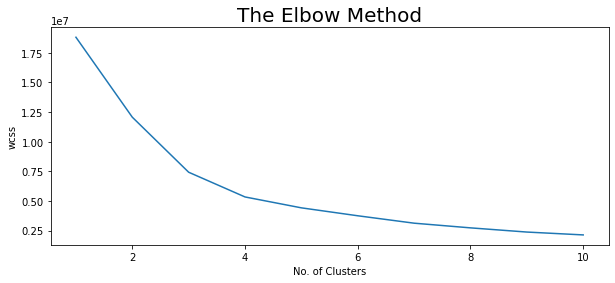

In [ ]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


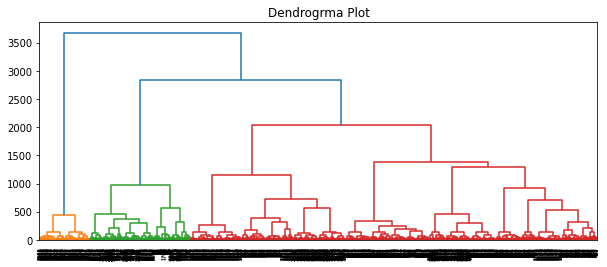

In [ ]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.show()

Hierarchical

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_her= hc.fit_predict(x)  

# lets find out the Results
b = df['label']
y_herr = pd.DataFrame(y_her)
w = pd.concat([y_herr, b], axis = 1)
w= w.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Hierachical Clustering Analysis \n")
print("Crops in Zero Cluster:", w[w['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in First Cluster:", w[w['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", w[w['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", w[w['cluster'] == 3]['label'].unique())

Hierachical Clustering Analysis 

Crops in Zero Cluster: ['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'orange' 'coconut']
---------------------------------------------------------------
Crops in First Cluster: ['maize' 'blackgram' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton']
---------------------------------------------------------------
Crops in Second Cluster: ['rice' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']


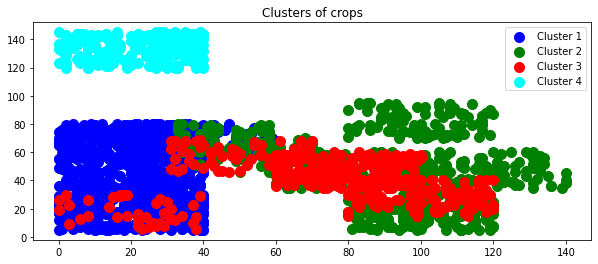

In [ ]:
#visulaizing the clusters  
plt.scatter(x[y_her == 0, 0], x[y_her == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_her == 1, 0], x[y_her == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_her== 2, 0], x[y_her == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_her == 3, 0], x[y_her == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.title('Clusters of crops')  
plt.legend()  
plt.show()

In [ ]:
crop_new=df.reset_index()

In [ ]:
crop_new

index    N   P   K  temperature   humidity        ph    rainfall   label
0         0   90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1         1   85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2         2   60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3         3   74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4         4   78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...     ...  ...  ..  ..          ...        ...       ...         ...     ...
2195   2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197   2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198   2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199   2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 9 columns]

N, P, K comparison between crops 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
x=crop_new.index,
y=crop_new['N'],
name='Nitrogen',
marker_color='aliceblue'
))
fig.add_trace(go.Bar(
x=crop_new.index,
y=crop_new['P'],
name='Phosphous',
marker_color='greenyellow'
))
fig.add_trace(go.Bar(
x=crop_new.index,
y=crop_new['K'],
name='Potassium',
marker_color='mediumpurple'
))
fig.update_layout(title="N, P, K values comparision between crops",
plot_bgcolor='white',
barmode='group',
xaxis_tickangle=-45)
fig.show()

Pandas profiling for Auto EDA

In [ ]:
profile = ProfileReport(df, title='Dataset to recommend Crop based on various Environmental factors', explorative = True)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = list(df.dtypes[df.dtypes == 'object'].index)
df_enc = df.copy()
for c in cols:
  label = LabelEncoder()
  label.fit(list(df[c].values))
  df_enc[c] = label.transform(list(df_enc[c].values))

In [ ]:
df_enc

N   P   K  temperature   humidity        ph    rainfall  label
0      90  42  43    20.879744  82.002744  6.502985  202.935536     20
1      85  58  41    21.770462  80.319644  7.038096  226.655537     20
2      60  55  44    23.004459  82.320763  7.840207  263.964248     20
3      74  35  40    26.491096  80.158363  6.980401  242.864034     20
4      78  42  42    20.130175  81.604873  7.628473  262.717340     20
...   ...  ..  ..          ...        ...       ...         ...    ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507      5
2196   99  15  27    27.417112  56.636362  6.086922  127.924610      5
2197  118  33  30    24.131797  67.225123  6.362608  173.322839      5
2198  117  32  34    26.272418  52.127394  6.758793  127.175293      5
2199  104  18  30    23.603016  60.396475  6.779833  140.937041      5

[2200 rows x 8 columns]

# Normalization

Let's see how the data is distributed

<AxesSubplot: xlabel='N', ylabel='Density'>

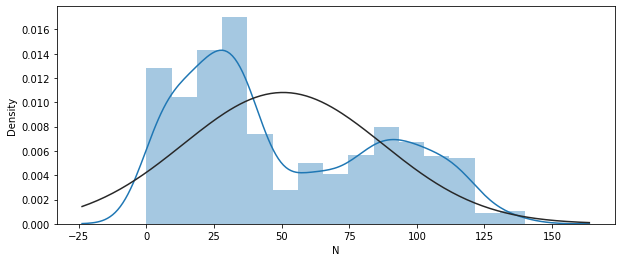

In [ ]:
sns.distplot(df_enc['N'], fit=norm)

((array([-3.41834386, -3.16906693, -3.03090347, ...,  3.03090347,
          3.16906693,  3.41834386]),
  array([  0,   0,   0, ..., 140, 140, 140])),
 (35.377836353265344, 50.55181818181818, 0.9571874513107337))

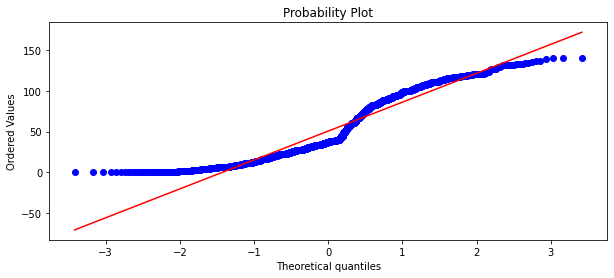

In [ ]:
stats.probplot(df_enc['N'], plot=plt)

<AxesSubplot: xlabel='P', ylabel='Density'>

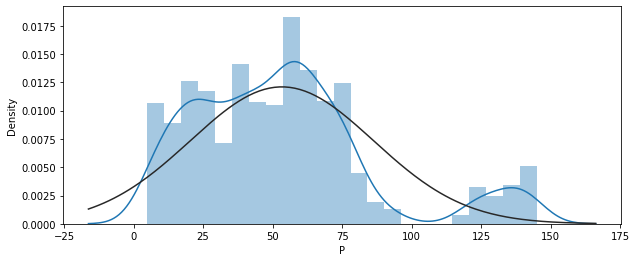

In [ ]:
sns.distplot(df_enc['P'], fit=norm)

<AxesSubplot: xlabel='humidity', ylabel='Density'>

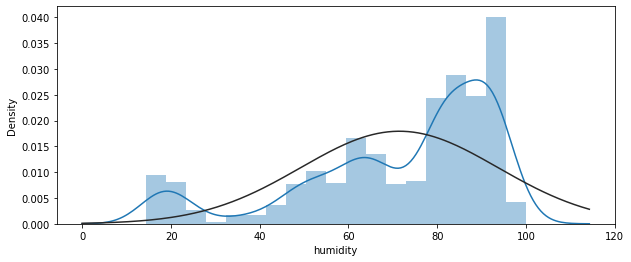

In [ ]:
sns.distplot(df_enc['humidity'], fit=norm)

<AxesSubplot: xlabel='rainfall', ylabel='Density'>

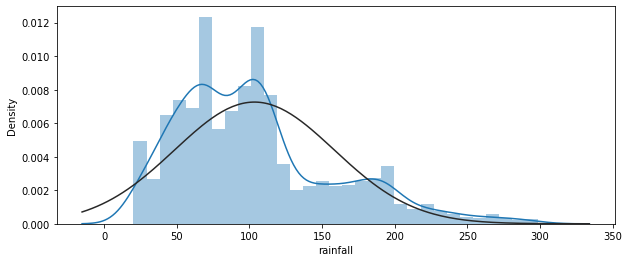

In [ ]:
sns.distplot(df_enc['rainfall'], fit=norm)

<AxesSubplot: xlabel='ph', ylabel='Density'>

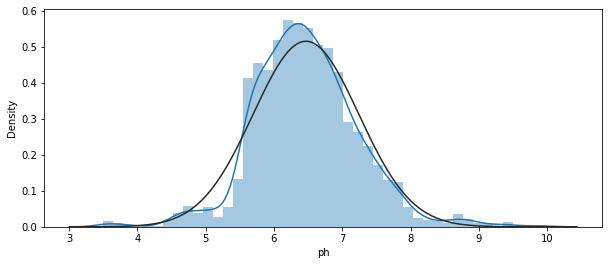

In [ ]:
sns.distplot(df_enc['ph'], fit=norm)

#Feature Engineering

In [ ]:
df_enc.shape

(2200, 8)

In [ ]:
df_enc.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

* AutoML(Featurewiz)

In [ ]:
!pip install featurewiz --ignore-installed --no-deps
!pip install --upgrade category_encoders
from featurewiz import featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 14.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 689 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
featurewiz 0.2.3 requires Pillow>=9.0.0, but you have pillow 7.1.2 which is incompatible.
featurewiz 0.2.3 requires pyarrow~=7.0.0, but you have pyarrow 9.0.0 which is incompatible.
featurewiz 0.2.3 requires xlrd>=2.0.0, but you have xlrd 1.2.0 which is incompatible.
Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_fla

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (2200, 8)
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were re

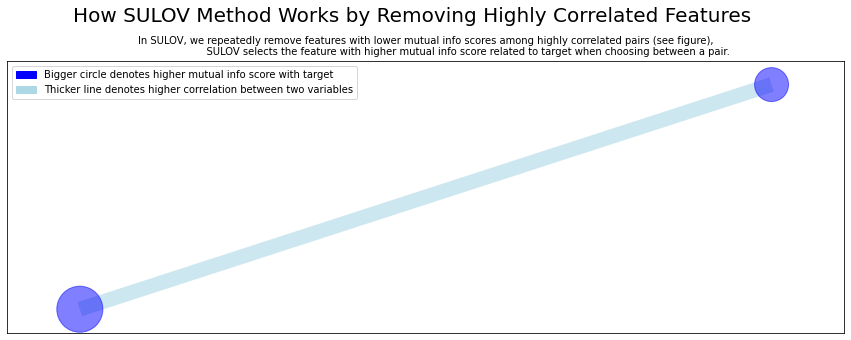

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 6
Final list of selected 6 vars after SULOV = ['N', 'humidity', 'ph', 'rainfall', 'temperature', 'P']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 6 
    Taking top 1 features per iteration...
    XGBoost version using 1.7.2 as tree method: gpu_hist
Number of booster rounds = 100
        using 6 variables...
Regular XGBoost is crashing due to: [21:04:15] ../src/gbm/gbtree.cc:611: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /usr/local/lib/python3.8/di

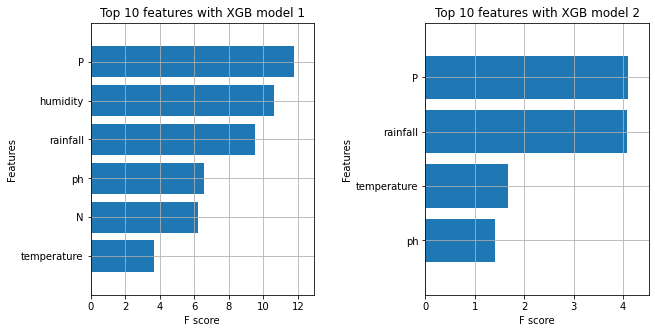

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 3 important features:
['P', 'humidity', 'rainfall']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 3 important features and a train dataframe


In [ ]:
target='label'
features = featurewiz(df_enc, target, corr_limit=0.70, verbose = 2)

In [ ]:
print('Selected %d features:%s' %(len(features),features))

Selected 2 features:(['P', 'humidity', 'rainfall'],        P   humidity    rainfall  label
0     42  82.002744  202.935536     20
1     58  80.319644  226.655537     20
2     55  82.320763  263.964248     20
3     35  80.158363  242.864034     20
4     42  81.604873  262.717340     20
...   ..        ...         ...    ...
2195  34  66.413269  177.774507      5
2196  15  56.636362  127.924610      5
2197  33  67.225123  173.322839      5
2198  32  52.127394  127.175293      5
2199  18  60.396475  140.937041      5

[2200 rows x 4 columns])


Potassium Feature is removed after SULOV method

# Features

In [ ]:
features = df[['N','P','temperature', 'humidity', 'ph', 'rainfall']]
features_full = df[['N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Training Models

In [ ]:
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [ ]:
# Initializing empty lists to append all model's name and corresponding accuracy
acc = []
model = []

* **Decision Tree**

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  87.27272727272727
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.67      1.00      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.76      1.00

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.89090909, 0.86818182, 0.88409091, 0.87954545, 0.88409091])

* **Guassian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.93      0.90 

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.98863636, 0.99090909, 0.98181818, 0.98863636, 0.98636364])

* **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.16818181818181818
              precision    recall  f1-score   support

       apple       1.00      0.38      0.56        13
      banana       1.00      0.41      0.58        17
   blackgram       1.00      0.25      0.40        16
    chickpea       1.00      0.10      0.17        21
     coconut       1.00      0.05      0.09        21
      coffee       1.00      0.05      0.09        22
      cotton       1.00      0.15      0.26        20
      grapes       1.00      0.11      0.20        18
        jute       1.00      0.14      0.25        28
 kidneybeans       0.04      1.00      0.07        14
      lentil       1.00      0.04      0.08        23
       maize       0.00      0.00      0.00        21
       mango       1.00      0.04      0.07        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.17      0.29        24
   muskmelon       1.00      0.43      0.61        23
      orange       1.00      0.03      0.

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.32954545, 0.31590909, 0.31363636, 0.3       , 0.28409091])

* **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8636363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.81      1.00      0.89        17
   blackgram       0.80      0.75      0.77        16
    chickpea       0.91      0.95      0.93        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       0.90      0.90      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       0.86      0.86      0.86        14
      lentil       0.78      0.91      0.84        23
       maize       0.88      0.71      0.79        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.78      0.74      0.76        19
    mungbean       0.91      0.88      0.89        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.68   

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.90909091, 0.87727273, 0.86363636, 0.89545455, 0.87272727])

* **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.96      0.90      0.93

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.98409091, 0.98863636, 0.98636364, 0.98636364, 0.99090909])

In [ ]:
models = pd.DataFrame({
    'Model' : model,
    'Accuracy' : acc
})

models.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
4                   RF  0.984091
1          Naive Bayes  0.979545
0        Decision Tree  0.872727
3  Logistic Regression  0.863636
2                  SVM  0.168182

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

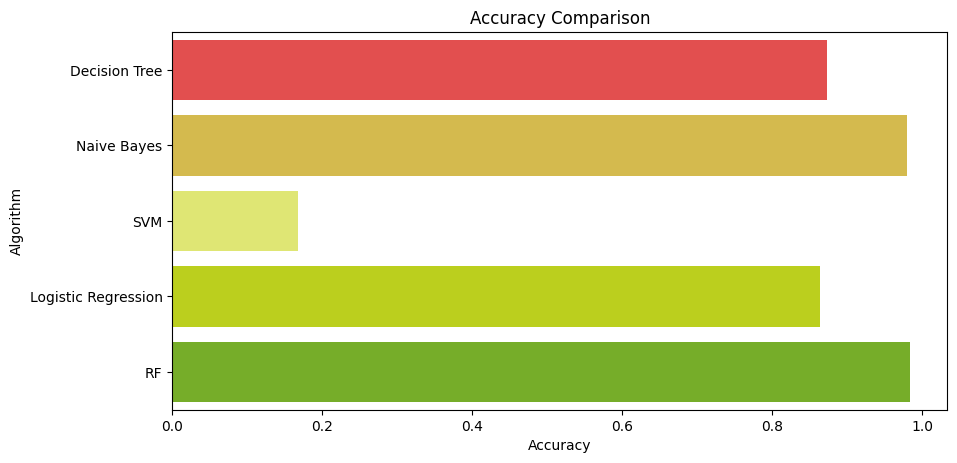

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette=my_colors1)

# Save The Model


Now Lets Save the model. We cannot save the model directly. Instead we need to convert into '.bin' format using pickle. \
**Pickle** - A built-in library to save python objects.

In [ ]:
import pickle

In [ ]:
C = '1.0'

In [ ]:
output_file = f'rf_model_C={C}.bin'
output_file

'rf_model_C=1.0.bin'

In [ ]:
with open(output_file, 'wb') as f_out:
  pickle.dump(RF, f_out)

In [ ]:
models = pd.DataFrame({
    'Model' : model,
    'Accuracy' : acc
})

models.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
4                   RF  0.984091
1          Naive Bayes  0.979545
0        Decision Tree  0.872727
3  Logistic Regression  0.863636
2                  SVM  0.168182

# Hurray 🎉 Now Lets predict

**Using Gradio App to provide input and get Crop Prediction with the model we developed**

In [ ]:
import pickle
import numpy as np

In [ ]:
with open('rf_model_C=1.0.bin', 'rb') as f_in:
  model = pickle.load(f_in)

In [ ]:
from pycaret.utils import enable_colab
enable_colab()
import jinja2
import gradio as gr

Colab mode enabled.


In [ ]:
def make_prediction(N, P, K, temperature, humidity, ph, rainfall):
    with open('rf_model_C=1.0.bin', 'rb') as f_in:
        model = pickle.load(f_in)
        preds = model.predict([[N, P, K, temperature, humidity, ph, rainfall]])
    return preds

#Create the input component for Gradio since we are expecting 4 inputs

N_input = gr.Number(label = "Enter the Nitrogen Level")
P_input = gr.Number(label= "Enter the phosphorus level")
K_input = gr.Textbox(label = "Enter Potassium level")
temperature_input = gr.Number(label = "Enter the temperature")
humidity_input = gr.Number(label = "Enter the humidity value")
ph_input = gr.Number(label= "Enter the pH level of soil")
rain_input = gr.Textbox(label = "Enter amount of rainfall")

# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[N_input, P_input, K_input, temperature_input, humidity_input, ph_input, rain_input], outputs=output)
app.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>